# <div style="text-align:center"><b>StackOverflow Developer Survey 2023 Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
survey_results = pd.read_csv("results_2023.csv")

In [3]:
# survey_results.isnull().any()

In [4]:
## Checking the structure of the dataframe
survey_results.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Question 1: At what companies do developers get paid the most?

In [5]:
## Grouping the rows by Industry categories and obtaining their respective annual mean compensation
highest_paying_companies = survey_results.groupby("Industry")["ConvertedCompYearly"].mean().sort_values(ascending=False)
x = highest_paying_companies.index
y = highest_paying_companies.values

## Checking the structure of the index and values
x, y

(Index(['Other', 'Financial Services', 'Advertising Services', 'Healthcare',
        'Insurance', 'Retail and Consumer Services',
        'Information Services, IT, Software Development, or other Technology',
        'Manufacturing, Transportation, or Supply Chain', 'Oil & Gas',
        'Legal Services', 'Higher Education', 'Wholesale'],
       dtype='object', name='Industry'),
 array([124288.99236641, 123977.34553909, 112730.65203252, 103571.10340776,
        100366.45043478,  98211.98195876,  94924.33833247,  89943.51524238,
         88982.88888889,  88300.56213018,  72076.87312572,  71881.67647059]))

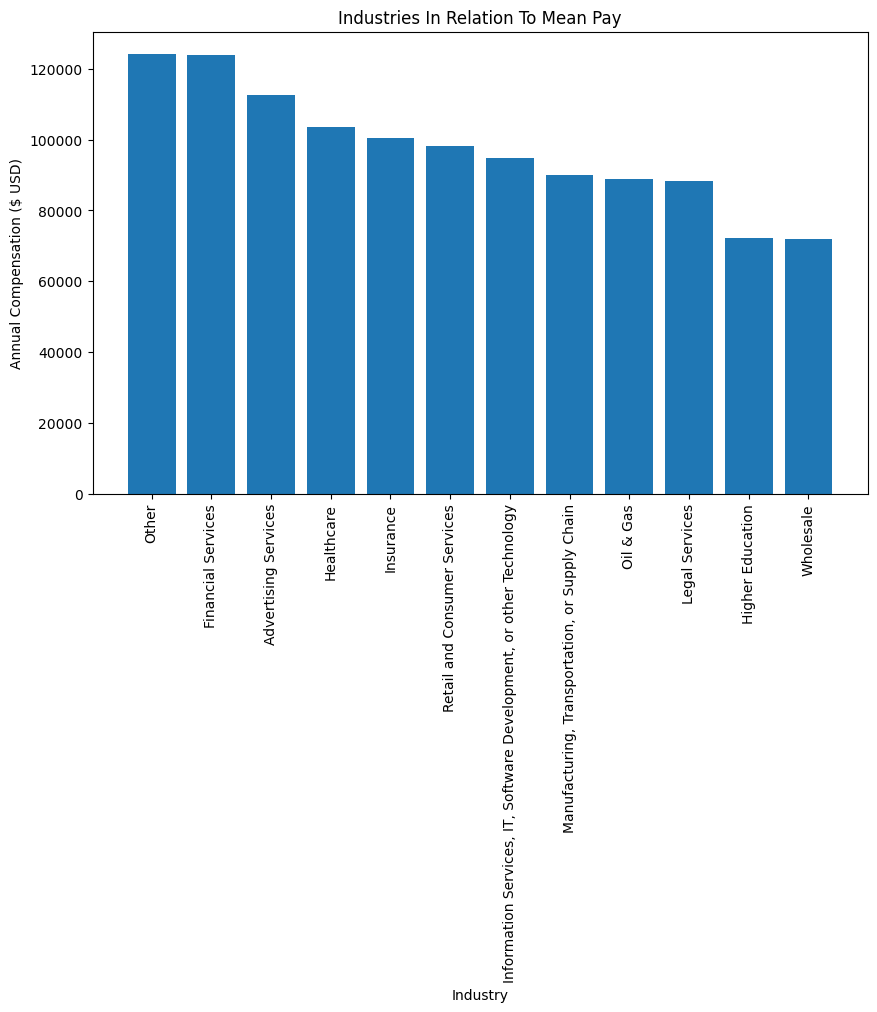

In [6]:
## Plotting the bar graph with the x and y variables obtained above
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Industries In Relation To Mean Pay")
plt.xticks(rotation=90)
plt.xlabel("Industry"), plt.ylabel("Annual Compensation ($ USD)")
plt.show()

## Question 2: How much does remote working matter to employees?

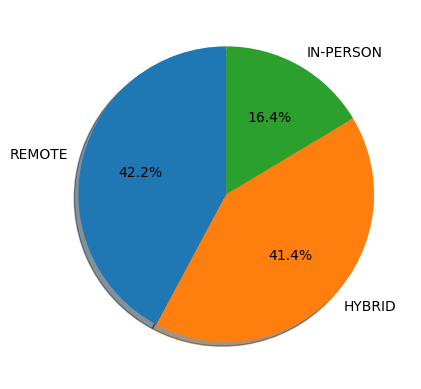

In [7]:
## Obtaining the value counts for the remote work column,
## the amount of people who are working remote, in-person, or hybrid
remote_impact = survey_results["RemoteWork"].value_counts()
remote_impact.values
labels = ["REMOTE", "HYBRID", "IN-PERSON"]

plt.pie(remote_impact.values, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()

## Given that vastly more people work solely remote versus solely in-person, it can be concluded that remote working matters significantly to many employees.

## Question 3: How does coding experience affect the level of pay?

In [8]:
## Grouping by years coded column, and calculating the mean for each year

coding_experience = survey_results[survey_results["YearsCode"].notna()]

## Simplifying the years code column to be less ambigiuous for data extrapolation
def condition(x):
    if x == "More than 50 years":
        return 51
    elif x == "Less than 1 year":
        return 0
    else:
        return int(x)

## Creating an integer version of the YearsCode column for ease of sorting
coding_experience["YearsCoding"] = coding_experience["YearsCode"].apply(condition)

coding_experience_counts = coding_experience.groupby("YearsCoding")["ConvertedCompYearly"].mean()

x = coding_experience_counts.index
y = coding_experience_counts.values

<ipython-input-8-fb8da2a3ebc1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coding_experience["YearsCoding"] = coding_experience["YearsCode"].apply(condition)


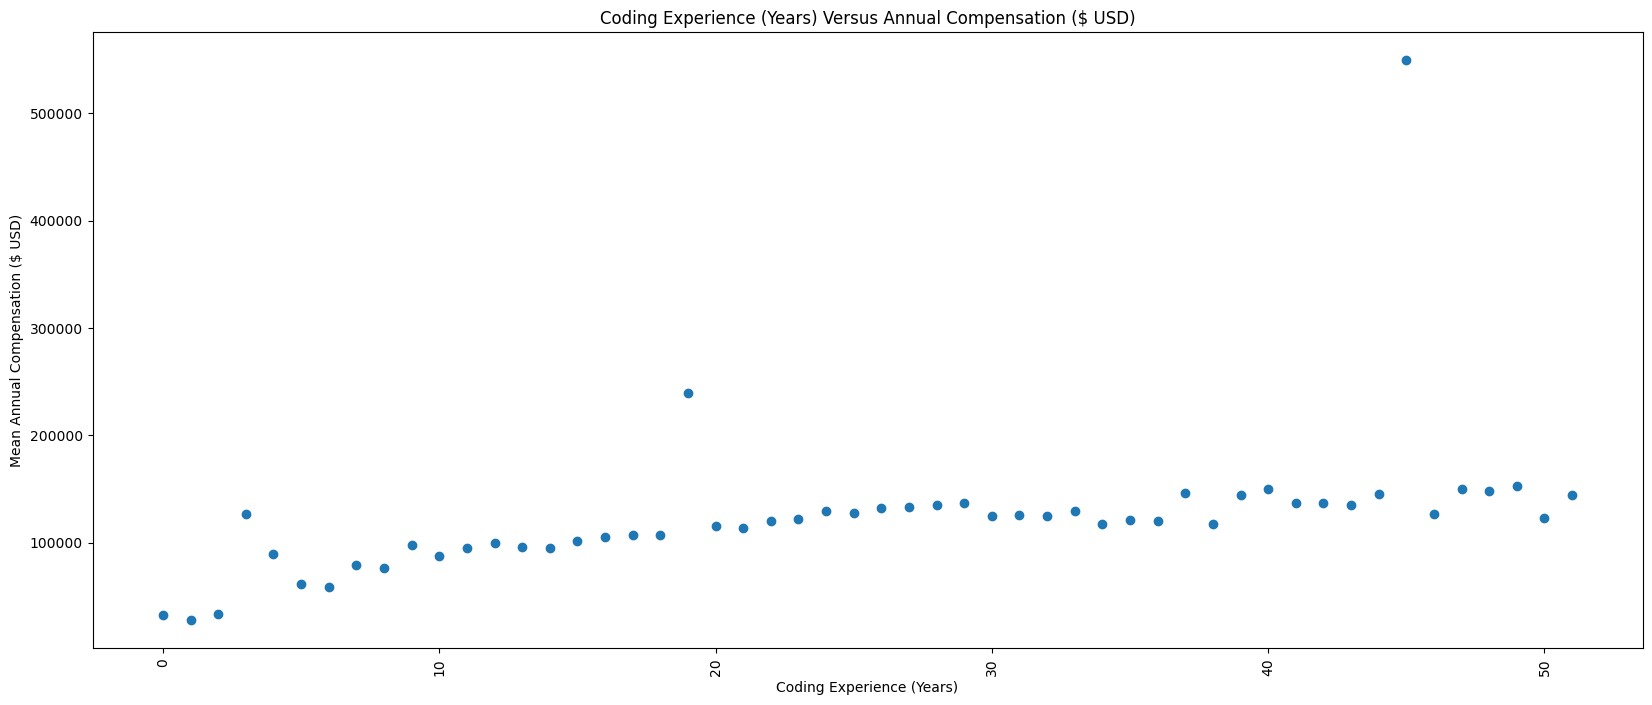

In [9]:
plt.figure(figsize=(20, 8))
plt.scatter(x, y)
plt.title("Coding Experience (Years) Versus Annual Compensation ($ USD)")
plt.xlabel("Coding Experience (Years)")
plt.xticks(rotation=90)
plt.ylabel("Mean Annual Compensation ($ USD)")
plt.show()

## As shown above, the general trend is that as the coding experience increases, so does the pay, i.e., there exists a <b><u>positive correlation, namely, a logarithmic relationship. </u></b> The outliers in the data can likely be attributed to misinputs in the survey or from a low sample size of high earners in that respective year influencing the mean.

## Question 4: What's the most popular method of learning to code?

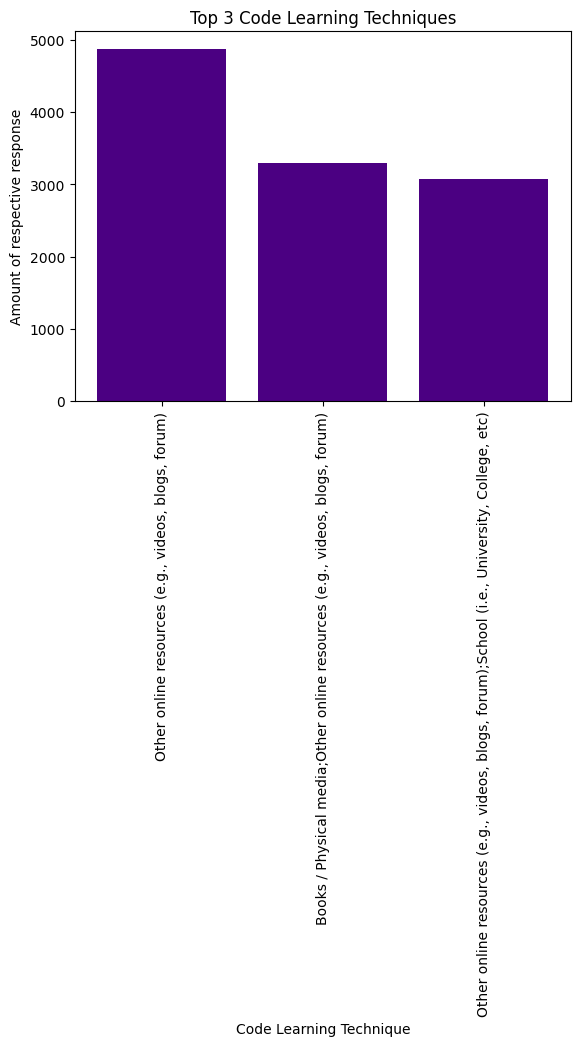

In [10]:
## Getting the top three techniques for which people learned to code
sr =survey_results["LearnCode"].value_counts().nlargest(3)
x = sr.index
y = sr.values

plt.bar(x, y, color="indigo")
plt.title("Top 3 Code Learning Techniques")
plt.xlabel("Code Learning Technique")
plt.xticks(rotation=90)
plt.ylabel("Amount of respective response")
plt.show()

## Thus it becomes evident that the most popular method of learning to code is a combination of the following: <ol><li style="color:red">Online resources <li style="color:blue">Books/physical media <li style="color: mediumspringgreen"> School</ol>

## Question 5: Are you more likely to get a developer job with a master's degree?

<ipython-input-11-ebcdefeb5313>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_data["Employed"] = employed_data["Employment"].apply(lambda x: "Yes" if "Employed, full-time" in x or "self-employed" in x else "No")
<ipython-input-11-ebcdefeb5313>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_data["Has_Masters"] = employed_data["EdLevel"].apply(lambda x: "Yes" if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in x else "No")


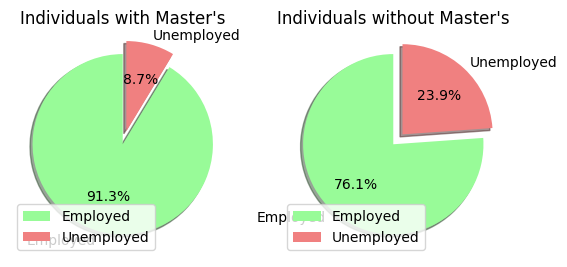

In [11]:
## Obtaining all employment data where the column isn't NaN
employed_data = survey_results[survey_results["Employment"].notna()]

## Creating new columns to directly determine if the record is employed and has a Master's
employed_data["Employed"] = employed_data["Employment"].apply(lambda x: "Yes" if "Employed, full-time" in x or "self-employed" in x else "No")
employed_data["Has_Masters"] = employed_data["EdLevel"].apply(lambda x: "Yes" if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in x else "No")

## Filtering the records with Master's and No Master's. 
masters = employed_data[employed_data["Has_Masters"] == "Yes"]
not_masters = employed_data[employed_data["Has_Masters"] == "No"]

## Obtaining the amount of individuals that are employed with and without a Master's
m = masters.groupby("Has_Masters")["Employed"].value_counts()
nm = not_masters.groupby("Has_Masters")["Employed"].value_counts()

## Settings for the pie charts 
labels = ["Employed", "Unemployed"]
color_scheme = ["palegreen", "lightcoral"]
myExplode = [0, 0.15]

## Creating subplots to neatly display the findings

## Master's subplot
plt.subplot(1, 2, 1)
plt.pie(m.values, autopct='%1.1f%%', startangle=90, shadow=True, labels=labels, colors=color_scheme, explode=myExplode)
plt.legend()
plt.title("Individuals with Master's")
## No Master's subplot
plt.subplot(1, 2, 2)
plt.pie(nm.values, autopct='%1.1f%%', startangle=90, shadow=True, labels=labels, colors=color_scheme, explode=myExplode)
plt.legend()
plt.title("Individuals without Master's")
plt.show()

## Thus, an individual is <b><u>more</b></u> likely to get a developer job with a Master's degree.